#### Comparison between virus infected and control wells

#### Loading packages

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm.auto import tqdm

from PyPlaque.experiment import FluorescenceMicroscopy
from PyPlaque.utils import create_grouped_bar_from_df
from PyPlaque.view import WellImageReadout, PlateReadout

np.random.seed(0)


/Users/de29/Applications/miniforge3/envs/PyPlaque_39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Initialising parameters and data
###### Since we would now like to get and compare the readouts from PyPlaque for a Fluorescent Plate, we define a new ```FluorescenceMicroscopy``` class instance to work with them.<br> ```base_dir``` is folder above the image and mask folders for all the plates. ```params``` are set to None to choose using the default parameters but values can be updated. <br>Using ```exp.get_individual_plates()``` we get the individual plate and plate mask folders for the given pattern and ```exp.get_number_of_plates()``` gives us the number of plates found according to pattern, here just 1.

In [2]:
# loading multiple plates and plate masks as an experiment
base_dir = '../../../../data_backup/samples_fluorescent_plaques/'
exp = FluorescenceMicroscopy(base_dir+'images', base_dir+'masks', params = None) 
# default values in class, option to update

# In this case, the individual plates are of 384 well plates for fluorescence plaques and
# their corresponding mask directories. Make sure to have similar directories for images 
# and masks(even if empty)
plate_dirs, plate_mask_dirs = exp.get_individual_plates(folder_pattern=r'^200601')

print(plate_dirs, plate_mask_dirs)

#We are choosing via the pattern above to ignore all other plates other than this one
print(exp.get_number_of_plates())


['200601-zplate-g2'] ['200601-zplate-g2']
1


#### Virus Channel
###### ```exp.load_wells_for_plate_virus()``` helps us load into memory all data for the virus channel,corresponding to the given index from the plates found ```plate_id``` and file pattern ```file_pattern```. File extension ```ext``` by default is '.tif' but can be changed if needed here. Here the well images are read as images and the masks path is empty and therefore masks are generated at runtime, based on ```params``` above. <br>We then check the correctness of the number of images found based on our path and identification patterns and then show an example of an image name, image and mask from the loaded data.

In [3]:
# Example considering all wells for channel w2 from the selected plate
# Masks are generated based on the params given or the default at load time, masks can be saved 
# in the mask directory for future use
plate_dict_w2 = exp.load_wells_for_plate_virus(plate_id=0, additional_subfolders='2020-06-03/2072',
                                            file_pattern=r'_([A-C]{1})1([1-4]{1})_s1_w2') #'_w2'
print(plate_dict_w2.keys())

768it [00:00, 286585.90it/s]
  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:04<00:00,  2.91it/s]

dict_keys(['200601-zplate-g2'])


In [4]:
print(len(plate_dict_w2['200601-zplate-g2']['img']))

12


../../../../data_backup/samples_fluorescent_plaques/images/200601-zplate-g2/2020-06-03/2072/200601-zplate-g2_C11_s1_w2.tif


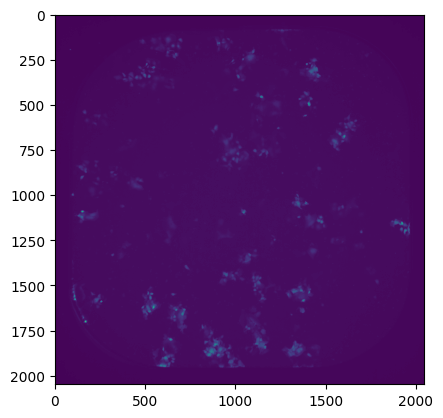

In [5]:
print(plate_dict_w2['200601-zplate-g2']['image_name'][8])
plt.imshow(plate_dict_w2['200601-zplate-g2']['img'][8])


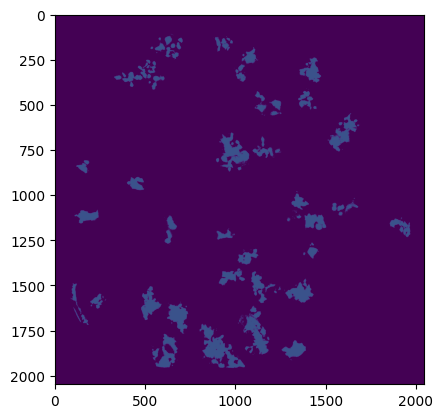

In [6]:
plt.imshow(plate_dict_w2['200601-zplate-g2']['mask'][8], vmin=0, vmax=4)

#### Nuclei Channel
###### ```exp.load_wells_for_plate_nuclei()``` helps us load into memory all data for the nuclei channel,corresponding to the given index from the plates found ```plate_id``` and file pattern ```file_pattern```. Here once again the mask path is empty for us but they are generated at runtime using the parameters saved with the instantiation of the experiment. Please have in mind that mask generation for virus and nuclei channel follow different procedures because of ground truth beliefs about the data there, so interchanging the channels may lead to unexpected and incorrect results. It is possible to have the images for both channels in the same directory and only tell them apart by the file pattern.<br>We then check the correctness of the number of images found based on our path and identification patterns and then show an example of an image name, image from the loaded data.

In [7]:
#Example considering a few wells for channel w1 from the selected plate
plate_dict_w1 = exp.load_wells_for_plate_nuclei(plate_id=0, additional_subfolders='2020-06-03/2072',
                                                file_pattern=r'_([A-C]{1})1([1-4]{1})_s1_w1') #'_w1'
print(plate_dict_w1.keys())

768it [00:00, 331470.00it/s]
  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [01:40<00:00,  8.36s/it]
12it [01:40,  8.36s/it]
12it [01:40,  8.36s/it]

dict_keys(['200601-zplate-g2'])


In [8]:
print(len(plate_dict_w1['200601-zplate-g2']['img']))

12


../../../../data_backup/samples_fluorescent_plaques/images/200601-zplate-g2/2020-06-03/2072/200601-zplate-g2_A11_s1_w1.tif


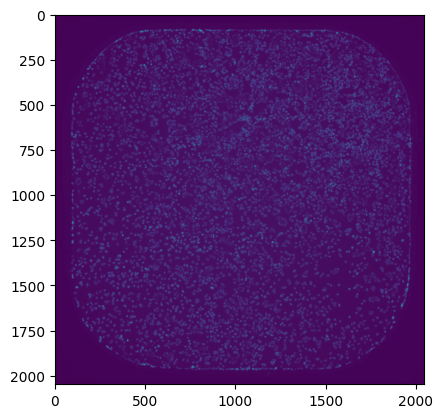

In [9]:
print(plate_dict_w1['200601-zplate-g2']['image_name'][0])
plt.imshow(plate_dict_w1['200601-zplate-g2']['img'][0])

#### Plate Readout
###### We use this class ```PlateReadout``` to get the well level and object level(here a plaque is an object) readouts for our entire plate of wells. We pass the experiment class containing all our data and parameters. We can use flags to indicate whether we would like readouts at both levels. Please note that both flags for ```well_level_readouts``` and ```object_level_readouts``` cannot be set to False and will lead to errors.<br>```plate_readout.generate_readouts_dataframe()``` generates the actual dataframe of readouts. To see how the dataframe of readouts look like see ```abs_df_image``` and ```abs_df_object``` below.

In [10]:
plate_readout = PlateReadout(experiment = exp, plate_id = 0, well_level_readouts=True, 
                                                                object_level_readouts=True )
abs_df_image, abs_df_object = plate_readout.generate_readouts_dataframe() 
# make sure to add row and column patterns here

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:27<00:00,  2.30s/it]


In [11]:
abs_df_image

,NucleiImageName,VirusImageName,maxNucleiIntensity,totalNucleiIntensity,meanNucleiIntensity,numberOfNuclei,maxVirusIntensity,totalVirusIntensity,meanVirusIntensity,numberOfPlaques,numberOfInfectedNuclei
0,200601-zplate-g2_A11_s1_w1.tif,200601-zplate-g2_A11_s1_w2.tif,29518,8.826185e+09,1023.500000,17481,27657,7241332090,1726.468108,28,2379
1,200601-zplate-g2_A12_s1_w1.tif,200601-zplate-g2_A12_s1_w2.tif,32724,8.921454e+09,1023.500547,17578,29558,7179918904,1711.826063,29,2257
2,200601-zplate-g2_A13_s1_w1.tif,200601-zplate-g2_A13_s1_w2.tif,32691,9.022117e+09,1023.500441,18059,11473,6748545039,1608.978519,1,69
3,200601-zplate-g2_A14_s1_w1.tif,200601-zplate-g2_A14_s1_w2.tif,32727,8.890458e+09,1023.500000,17995,65535,6760565544,1611.844431,0,0
4,200601-zplate-g2_B11_s1_w1.tif,200601-zplate-g2_B11_s1_w2.tif,32579,8.237035e+09,1023.499354,14881,21967,7044377572,1679.510491,32,2096
5,200601-zplate-g2_B12_s1_w1.tif,200601-zplate-g2_B12_s1_w2.tif,32264,8.263427e+09,1023.498927,14791,30928,7069717524,1685.552007,26,1933
6,200601-zplate-g2_B13_s1_w1.tif,200601-zplate-g2_B13_s1_w2.tif,32504,8.663831e+09,1023.500270,16269,19421,6651261276,1585.784263,1,47
7,200601-zplate-g2_B14_s1_w1.tif,200601-zplate-g2_B14_s1_w2.tif,32373,8.634101e+09,1023.499971,16327,31223,6673374969,1591.056578,0,0
8,200601-zplate-g2_C11_s1_w1.tif,200601-zplate-g2_C11_s1_w2.tif,32479,8.873617e+09,1023.499705,17410,25132,7110491460,1695.273271,34,2118
9,200601-zplate-g2_C12_s1_w1.tif,200601-zplate-g2_C12_s1_w2.tif,32430,8.915507e+09,1023.500432,17862,37959,6978843370,1663.885920,23,1429


#### Filtering Readouts
###### It is possible that we wish to look at specific wells because they form the control or some other category of interest to us. This can be done as shown below using a regular expression. Please use your own to get to different subsets. We have shown examples of two exclusive categories, control and viral wells splitting the dataframe into parts namely ```abs_df_image_control``` and ```abs_df_image_viral``` for example.<br> Thereafter we have done the same with the object level readouts dataframe ```abs_df_object``` splitting it into ```abs_df_object_control``` and ```abs_df_object_viral``` respectively.

In [12]:
control_regex = '_([A-C]{1})1([3-4]{1})_s1_w1' #'_([A-C]{1})(1[3-9]{1}|2[0-4]{1})_s1_w1'
abs_df_image_control = abs_df_image[abs_df_image.NucleiImageName.str.contains(control_regex)]

/var/folders/ww/drh8wc992nxcqb4z8dmykc440000gn/T/ipykernel_76685/149290852.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  abs_df_image_control = abs_df_image[abs_df_image.NucleiImageName.str.contains(control_regex)]


In [13]:
abs_df_image_control

,NucleiImageName,VirusImageName,maxNucleiIntensity,totalNucleiIntensity,meanNucleiIntensity,numberOfNuclei,maxVirusIntensity,totalVirusIntensity,meanVirusIntensity,numberOfPlaques,numberOfInfectedNuclei
2,200601-zplate-g2_A13_s1_w1.tif,200601-zplate-g2_A13_s1_w2.tif,32691,9.022117e+09,1023.500441,18059,11473,6748545039,1608.978519,1,69
3,200601-zplate-g2_A14_s1_w1.tif,200601-zplate-g2_A14_s1_w2.tif,32727,8.890458e+09,1023.500000,17995,65535,6760565544,1611.844431,0,0
6,200601-zplate-g2_B13_s1_w1.tif,200601-zplate-g2_B13_s1_w2.tif,32504,8.663831e+09,1023.500270,16269,19421,6651261276,1585.784263,1,47
7,200601-zplate-g2_B14_s1_w1.tif,200601-zplate-g2_B14_s1_w2.tif,32373,8.634101e+09,1023.499971,16327,31223,6673374969,1591.056578,0,0
10,200601-zplate-g2_C13_s1_w1.tif,200601-zplate-g2_C13_s1_w2.tif,30855,8.970187e+09,1023.500168,17792,21034,6668238357,1589.831914,0,0
11,200601-zplate-g2_C14_s1_w1.tif,200601-zplate-g2_C14_s1_w2.tif,32736,8.735790e+09,1023.499990,17448,65535,6647010952,1584.770906,0,0


In [14]:
viral_regex = '_([A-C]{1})1([1-2]{1})_s1_w1' #'_([A-C]{1})(0[1-9]{1}|1[0-2]{1})_s1_w1'
abs_df_image_viral = abs_df_image[abs_df_image.NucleiImageName.str.contains(viral_regex)]

/var/folders/ww/drh8wc992nxcqb4z8dmykc440000gn/T/ipykernel_76685/2147489856.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  abs_df_image_viral = abs_df_image[abs_df_image.NucleiImageName.str.contains(viral_regex)]


In [15]:
abs_df_image_viral

,NucleiImageName,VirusImageName,maxNucleiIntensity,totalNucleiIntensity,meanNucleiIntensity,numberOfNuclei,maxVirusIntensity,totalVirusIntensity,meanVirusIntensity,numberOfPlaques,numberOfInfectedNuclei
0,200601-zplate-g2_A11_s1_w1.tif,200601-zplate-g2_A11_s1_w2.tif,29518,8.826185e+09,1023.500000,17481,27657,7241332090,1726.468108,28,2379
1,200601-zplate-g2_A12_s1_w1.tif,200601-zplate-g2_A12_s1_w2.tif,32724,8.921454e+09,1023.500547,17578,29558,7179918904,1711.826063,29,2257
4,200601-zplate-g2_B11_s1_w1.tif,200601-zplate-g2_B11_s1_w2.tif,32579,8.237035e+09,1023.499354,14881,21967,7044377572,1679.510491,32,2096
5,200601-zplate-g2_B12_s1_w1.tif,200601-zplate-g2_B12_s1_w2.tif,32264,8.263427e+09,1023.498927,14791,30928,7069717524,1685.552007,26,1933
8,200601-zplate-g2_C11_s1_w1.tif,200601-zplate-g2_C11_s1_w2.tif,32479,8.873617e+09,1023.499705,17410,25132,7110491460,1695.273271,34,2118
9,200601-zplate-g2_C12_s1_w1.tif,200601-zplate-g2_C12_s1_w2.tif,32430,8.915507e+09,1023.500432,17862,37959,6978843370,1663.885920,23,1429


In [16]:
abs_df_object

,wellRow,wellColumn,Area,Centroid_1,Centroid_2,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Roundness,numberOfPeaks,numberOfNucleiInPlaque,numberOfInfectedNucleiInPlaque,maxIntensityGFP,totalIntensityGFP,meanIntensityGFP
0,A,11,6522.612903,1005.410624,814.300108,140.939647,74.543850,0.779022,10011.354839,0.267053,1.0,56.390133,44.641746,13134.354839,2.440231e+07,59.145226
1,A,12,6395.300000,1002.489548,1057.530786,127.692255,79.978626,0.686473,10081.366667,0.280010,1.0,61.220784,46.925098,12726.433333,2.407850e+07,56.826493
2,A,13,5844.000000,313.346338,1789.969199,534.812721,32.850653,0.996297,17716.000000,0.031211,2.0,162.670588,69.235294,6510.000000,1.806639e+07,142.441801
3,A,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000
4,B,11,5567.781250,999.773338,1180.727750,123.455496,74.151295,0.702005,8870.812500,0.283976,1.0,46.491912,38.657721,11057.000000,1.991291e+07,54.531547
5,B,12,5869.428571,889.780141,1045.132192,121.412302,75.380707,0.701310,8925.892857,0.292832,1.0,47.944538,39.992017,11146.750000,2.127524e+07,54.489453
6,B,13,4027.000000,1374.993047,364.146014,174.871418,41.140870,0.952005,5978.000000,0.174423,1.0,56.823529,43.611765,6040.000000,1.258126e+07,57.986149
7,B,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000
8,C,11,6669.037037,1145.554962,1008.768893,138.425194,75.865634,0.757848,10083.703704,0.275936,1.0,63.591721,48.691503,10732.703704,2.373143e+07,59.711433
9,C,12,4858.480000,904.687033,1114.382286,111.155940,70.126862,0.712886,7261.720000,0.282333,1.0,45.515294,36.134588,9085.560000,1.719353e+07,51.759145


In [17]:
control_regex = '1[3-4]{1}' #'(1[3-9]{1}|2[0-4]{1})'
abs_df_object_control = abs_df_object[abs_df_object.wellColumn.str.contains(control_regex)]


In [18]:
abs_df_object_control 

,wellRow,wellColumn,Area,Centroid_1,Centroid_2,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Roundness,numberOfPeaks,numberOfNucleiInPlaque,numberOfInfectedNucleiInPlaque,maxIntensityGFP,totalIntensityGFP,meanIntensityGFP
2,A,13,5844.0,313.346338,1789.969199,534.812721,32.850653,0.996297,17716.0,0.031211,2.0,162.670588,69.235294,6510.0,18066387.0,142.441801
3,A,14,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
6,B,13,4027.0,1374.993047,364.146014,174.871418,41.140870,0.952005,5978.0,0.174423,1.0,56.823529,43.611765,6040.0,12581258.0,57.986149
7,B,14,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
10,C,13,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
11,C,14,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [19]:
viral_regex = '1[1-2]{1}' #'(0[1-9]{1}|1[0-2]{1})'
abs_df_object_viral = abs_df_object[abs_df_object.wellColumn.str.contains(viral_regex)]


In [20]:
abs_df_object_viral

,wellRow,wellColumn,Area,Centroid_1,Centroid_2,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Roundness,numberOfPeaks,numberOfNucleiInPlaque,numberOfInfectedNucleiInPlaque,maxIntensityGFP,totalIntensityGFP,meanIntensityGFP
0,A,11,6522.612903,1005.410624,814.300108,140.939647,74.543850,0.779022,10011.354839,0.267053,1.0,56.390133,44.641746,13134.354839,2.440231e+07,59.145226
1,A,12,6395.300000,1002.489548,1057.530786,127.692255,79.978626,0.686473,10081.366667,0.280010,1.0,61.220784,46.925098,12726.433333,2.407850e+07,56.826493
4,B,11,5567.781250,999.773338,1180.727750,123.455496,74.151295,0.702005,8870.812500,0.283976,1.0,46.491912,38.657721,11057.000000,1.991291e+07,54.531547
5,B,12,5869.428571,889.780141,1045.132192,121.412302,75.380707,0.701310,8925.892857,0.292832,1.0,47.944538,39.992017,11146.750000,2.127524e+07,54.489453
8,C,11,6669.037037,1145.554962,1008.768893,138.425194,75.865634,0.757848,10083.703704,0.275936,1.0,63.591721,48.691503,10732.703704,2.373143e+07,59.711433
9,C,12,4858.480000,904.687033,1114.382286,111.155940,70.126862,0.712886,7261.720000,0.282333,1.0,45.515294,36.134588,9085.560000,1.719353e+07,51.759145


#### Visualising control and viral readouts
###### Another useful way to look at the above output is to visualise it. We can do that by passing the viral and control parts of the dataframes to our function ```create_grouped_bar_from_df()``` and specifying for which column we wish to see the plot. The ```normalize``` flag can be to True for columns other than counts of absolute values where normalisation within the range of the maxima and minima using a ```MinMaxScaler```(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) makes sense.

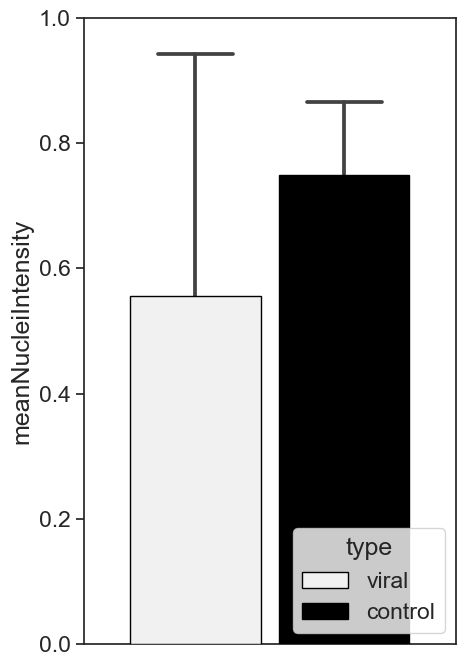

In [21]:
create_grouped_bar_from_df(abs_df_image_viral, abs_df_image_control, 'meanNucleiIntensity', 
        normalize=True) #save_path='../../../../manuscript/figs/comparison_meanNucleiIntensity.svg')

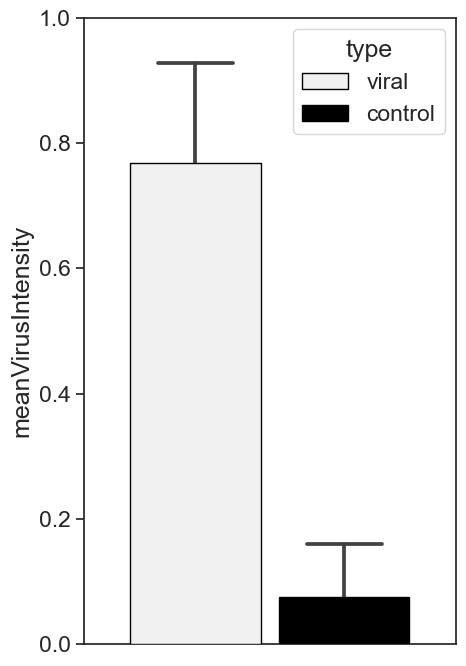

In [22]:
create_grouped_bar_from_df(abs_df_image_viral, abs_df_image_control, 'meanVirusIntensity', 
        normalize=True) #save_path='../../../../manuscript/figs/comparison_meanVirusIntensity.svg')

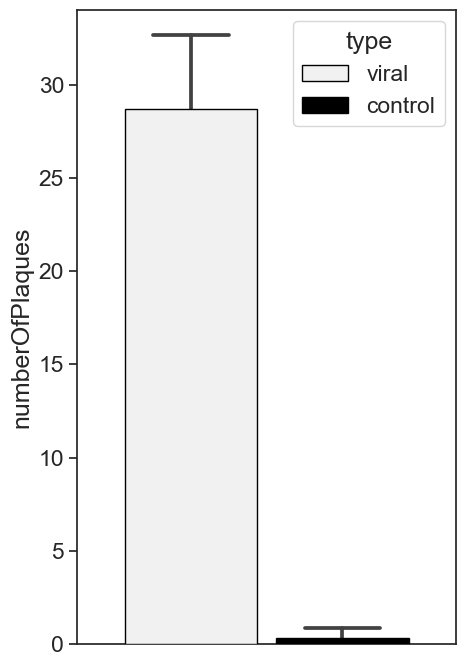

In [23]:
create_grouped_bar_from_df(abs_df_image_viral, abs_df_image_control, 'numberOfPlaques') 
#save_path='../../../../manuscript/figs/comparison_numberOfPlaques.svg')

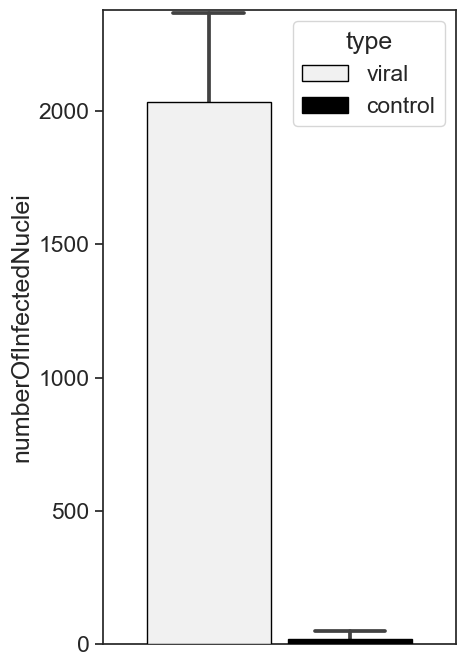

In [24]:
create_grouped_bar_from_df(abs_df_image_viral, abs_df_image_control, 'numberOfInfectedNuclei') 
#save_path='../../../../manuscript/figs/comparison_numberOfInfectedNuclei.svg')

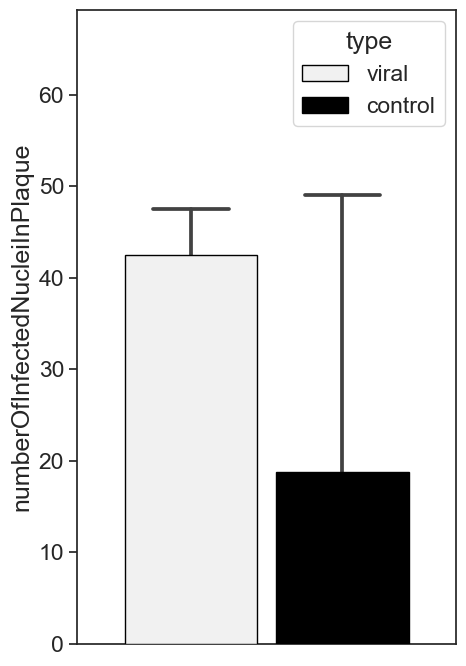

In [25]:
create_grouped_bar_from_df(abs_df_object_viral, abs_df_object_control,
                                    'numberOfInfectedNucleiInPlaque') 
#save_path='../../../../manuscript/figs/comparison_numberOfInfectedNucleiInPlaque.svg')

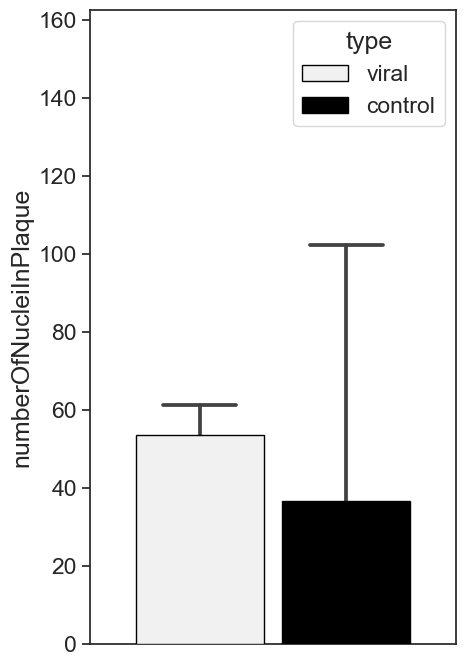

In [26]:
create_grouped_bar_from_df(abs_df_object_viral, abs_df_object_control, 'numberOfNucleiInPlaque') 
#save_path='../../../../manuscript/figs/comparison_numberOfNucleiInPlaque.svg')

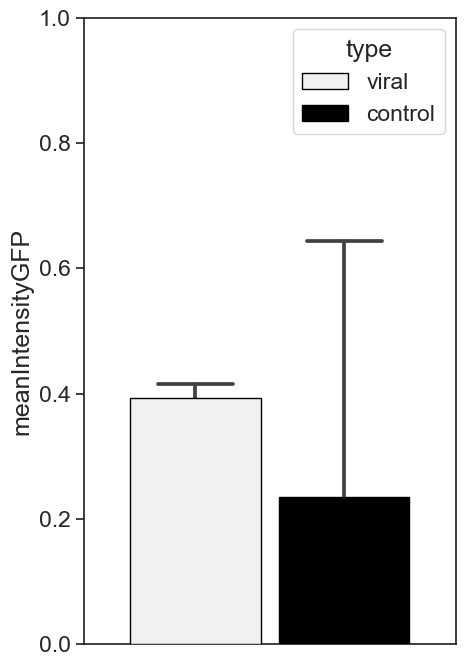

In [27]:
create_grouped_bar_from_df(abs_df_object_viral, abs_df_object_control, 'meanIntensityGFP', 
        normalize=True) #save_path='../../../../manuscript/figs/comparison_meanIntensityGFP.svg')

#### Probe into objects that have been found in the control section of the plate
###### It is noteworthy that sometimes that values such as ```meanIntensityGFP``` and ```numberOfInfectedNucleiInPlaque``` in the control part of the dataframes are not always zero whereas it is expected to be. So we set up a probe into why. We consider each of the wells in the control part of the plate here identified by the column of the well being greater than 12, taken care of by the regex matching on the col_id. We display those wells in the control part for which some plaques have been identified which ideally should not be so but in the images we can see the reason for it (hair, random high intensity etc.).

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:10<00:00,  1.11it/s]


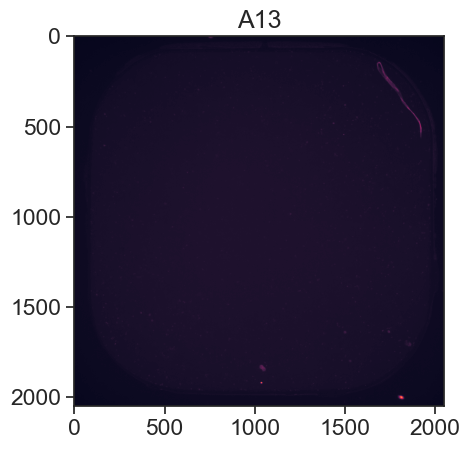

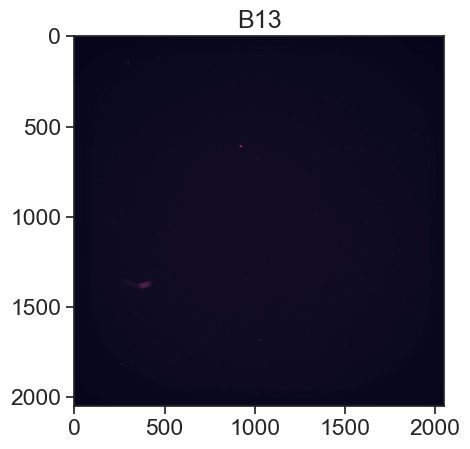

In [28]:
d = exp.plate_indiv_dir[0]

for i in tqdm(range(len(exp.plate_dict_w2[d]['img']))):
    plq_image_readout = WellImageReadout(nuclei_image_name=str(exp.plate_dict_w1[d]
                                        ['image_name'][i]).split("/")[-1],
                    plaque_image_name=str(exp.plate_dict_w2[d]['image_name'][i]).split("/")[-1],
                    nuclei_image=np.array(exp.plate_dict_w1[d]['img'][i]),
                    plaque_image=np.array(exp.plate_dict_w2[d]['img'][i]),
                    nuclei_mask=np.array(exp.plate_dict_w1[d]['mask'][i]),
                    plaque_mask=np.array(exp.plate_dict_w2[d]['mask'][i]),
                    virus_params=exp.params['virus'])
                            
    well_id = plq_image_readout.get_row(row_pattern = r'([A-Z]{1}[0-9]{2})')
    col_id = plq_image_readout.get_column(column_pattern = r'[A-Z]{1}([0-9]{2})')

    plq_objects = plq_image_readout.get_plaque_objects()
            
    if len(re.findall(r'(1[3-9]{1}|2[0-4]{1})', col_id))>0:
        if len(plq_objects) != 0:
            plt.figure()
            plt.imshow(plate_dict_w2['200601-zplate-g2']['img'][i])
            plt.title(well_id)
